# Bibliographie

<https://fr.wikipedia.org/wiki/P%C3%A9riode_de_retour>

Etude des crues à Passau : un article très intéressant 

<http://www.floods.org/ace-files/documentlibrary/Publications/asfpmpubs-techrep7_2015.pdf>

# Construction du graphique 

On va repartir de l'histogramme cumulé. 

In [1]:
import pandas as pd

/Users/kappamaki/anaconda/lib/python3.4/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
df = pd.read_csv('data/export_h_complet.csv', parse_dates=['date']).set_index('date')
df.head()

,h
date,
1885-09-26 08:00:00,90.0
1885-10-30 15:00:00,230.0
1885-11-30 15:00:00,250.0
1885-12-11 08:00:00,560.0
1886-01-30 08:00:00,400.0


In [3]:
df.describe()

,h
count,1315.000000
mean,193.250875
std,113.616717
min,0.000000
25%,115.000000
50%,147.000000
75%,235.500000
max,862.000000


In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

<IPython.core.display.Javascript object>


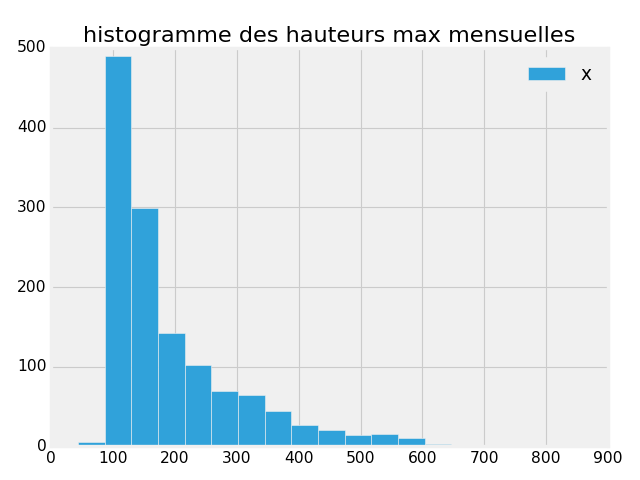

In [5]:
plt.figure()
df.h.hist(bins=20, label='x')
plt.title('histogramme des hauteurs max mensuelles')
plt.legend()

D'après wikipedia, la période de récurrence se calcule à l'aide de :
$$
\text{nombre d'années de données} + 1 \over \text{nombre d'évènements}
$$

On peut calculer le nombre d'années, $n$ ainsi : 

In [6]:
n = (df.index[-1] - df.index[0]).days / 365.25
n

130.5927446954141

Si je repars des classes de l'histogramme, je peux en déduire les périodes de retour :

In [7]:
import numpy as np

In [8]:
bins = np.logspace(start=2, stop=2.95, num=20)
bins

array([ 100.        ,  112.20184543,  125.89254118,  141.25375446,
        158.48931925,  177.827941  ,  199.5262315 ,  223.87211386,
        251.18864315,  281.83829313,  316.22776602,  354.81338923,
        398.10717055,  446.68359215,  501.18723363,  562.34132519,
        630.95734448,  707.94578438,  794.32823472,  891.25093813])

In [9]:
hist, bin_edges = np.histogram(df.h.values, bins=bins)

In [10]:
hist

array([182, 188, 160, 106,  81,  72,  75,  69,  45,  62,  48,  39,  29,
        27,  17,  13,   2,   3,   1])

In [11]:
bin_edges.shape

(20,)

In [12]:
hist.shape

(19,)

In [13]:
bin_values = (bin_edges[:-1] + bin_edges[1:]) / 2

In [14]:
return_periods = (n + 1) / hist

In [15]:
return_periods

array([   0.72303706,    0.69996141,    0.82245465,    1.24144099,
          1.62460179,    1.82767701,    1.75456993,    1.90714123,
          2.92428322,    2.12246362,    2.74151551,    3.37417294,
          4.53768085,    4.87380536,    7.74074969,   10.12251882,
         65.79637235,   43.86424823,  131.5927447 ])

<IPython.core.display.Javascript object>


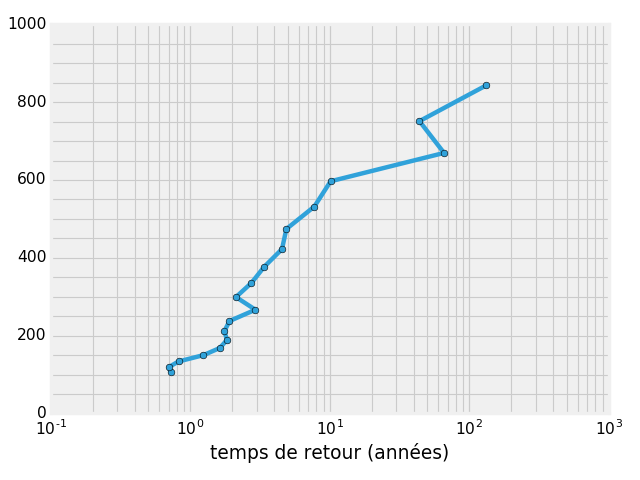

(0, 1000)

In [16]:
plt.figure()
plt.semilogx(return_periods, bin_values, '-o')
plt.xscale('log', subsx=[1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.minorticks_on()
plt.grid(which='minor')
plt.xlabel('temps de retour (années)')
plt.tight_layout()
plt.xlim(0.1, 1000)
plt.ylim(0, 1000)

# Avec l'histogramme cumulé 

On peut aussi faire d'autres choses, comme par exemple une CDF empirique. Je peux fixer des niveaux et compter le nombre d'occurences au dessus de ces niveaux pour en déduire un temps de retour.

L'idée est ici : <http://stackoverflow.com/questions/10640759/how-to-get-the-cumulative-distribution-function-with-numpy>

In [17]:
levels = np.linspace(200, 1000)
return_periods = [n / sum(df.h.values > level) for level in levels]

<IPython.core.display.Javascript object>


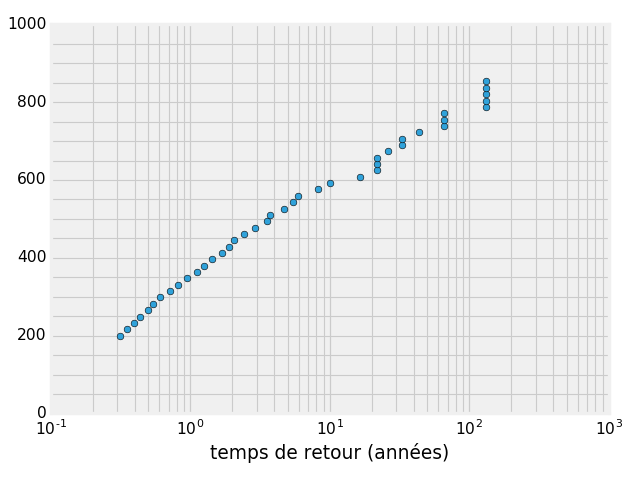

(0, 1000)

In [18]:
plt.figure()
plt.semilogx(return_periods, levels, 'o')
plt.xscale('log', subsx=[1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.minorticks_on()
plt.grid(which='minor')
plt.xlabel('temps de retour (années)')
plt.tight_layout()
plt.xlim(0.1, 1000)
plt.ylim(0, 1000)